# Importing Excel files
- This notebook shows how to import data which is stored in excel. This may be an old supplement of someones MELTS models, it may be a spreadsheet of melt inclusion or glass compositions etc
- You can download the files here:
- https://github.com/PennyWieser/PySulfSat/blob/main/docs/Examples/Data_Input/Dataset_S1.xlsx
- https://github.com/PennyWieser/PySulfSat/blob/main/docs/Examples/Data_Input/Glass_input_example.xlsx

## If you havent done so already, you need to pip install PySulfSat
- Do this by removing the #. You only need to do this once per computer. After your initial installation, you will want to upgrade instead using the second command


In [1]:
#!pip install PySulfSat
#!pip install PySulfSat --upgrade

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss
pd.options.display.max_columns = None
ss.__version__

'0.0.9'

## Importing a spreadsheet
- Here we import MELTS models which have already been reformatted (e.g. in supporting information)

In [3]:
df_out=ss.import_data('Dataset_S1.xlsx', sheet_name='MELTS_Model_01H2O', suffix="_Liq")
df_out.head()

We have replaced all missing liquid oxides and strings with zeros. 


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,Temp (K) MELTS_Liq,FeO_Liq,Fe2O3_Liq,H2O_Incom_Liq,Temp_HT1987_C_Liq,Factor_Liq,H2O_test_Liq,Sample_ID_Liq_Liq
0,51.456179,2.601690,13.529073,11.114610,0.185873,6.698477,10.974609,2.406926,0.483801,0.248535,0.101655,0.0,0.0,0.0,1445.220313,9.447747,1.852481,0.514405,1148.639387,1.000000,0.514405,0
1,51.458756,2.620771,13.619359,11.144152,0.187638,6.602326,10.898161,2.428038,0.488395,0.250895,0.102621,0.0,0.0,0.0,1443.220313,9.475545,1.854419,0.519548,1146.706750,1.009998,0.519548,1
2,51.462403,2.641448,13.717522,11.175642,0.189570,6.497934,10.814571,2.451116,0.493423,0.253478,0.103677,0.0,0.0,0.0,1441.220313,9.505299,1.856348,0.524889,1144.608472,1.020381,0.524889,2
3,51.469782,2.672548,13.761157,11.246506,0.192293,6.408435,10.713787,2.472653,0.500306,0.257120,0.105167,0.0,0.0,0.0,1439.220313,9.568634,1.864716,0.535182,1142.809538,1.040389,0.535182,3
4,51.481354,2.721741,13.714324,11.384440,0.196378,6.342291,10.585430,2.491197,0.510364,0.262582,0.107401,0.0,0.0,0.0,1437.220313,9.688901,1.884351,0.546507,1141.480047,1.062405,0.546507,4


In [5]:
Smythe_CalcSulf=ss.calculate_S2017_SCSS(df=df_out, T_K=df_out['Temp (K) MELTS_Liq'], 
P_kbar=5, Fe_FeNiCu_Sulf=0.65,
Fe3Fet_Liq=df_out['Fe3Fet_Liq'])

Smythe_CalcSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
no non ideal SCSS as no Cu/CuFeNiCu


,SCSS2_ppm_ideal_Smythe2017,SCSS2_ppm_ideal_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,Mn_wt_atom,Fe2_wt_atom,Fe3_wt_atom,Ca_wt_atom,Na_wt_atom,K_wt_atom,P_wt_atom,H_wt_atom,Si_XA_ideal,Ti_XA_ideal,Al_XA_ideal,Mg_XA_ideal,Fe2_XA_ideal,Ca_XA_ideal,Na_XA_ideal,K_XA_ideal,H_XA_ideal,Si*Fe_ideal,Si_XA_non_ideal,Ti_XA_non_ideal,Al_XA_non_ideal,Mg_XA_non_ideal,Fe2_XA_non_ideal,Ca_XA_non_ideal,Na_XA_non_ideal,K_XA_non_ideal,H_XA_non_ideal,Si*Fe_non_ideal,log_SCSS_ideal,Fe_FeNiCu_Sulf_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,Temp (K) MELTS_Liq,FeO_Liq,Fe2O3_Liq,H2O_Incom_Liq,Temp_HT1987_C_Liq,Factor_Liq,H2O_test_Liq,Sample_ID_Liq_Liq,Fe_FeNiCu_Sulf_calc
0,1006.245025,274.875727,1445.220313,5,0.65,0.0,0.482131,0.018332,0.149400,0.093565,0.001475,0.087091,0.0,0.110173,0.043725,0.005783,0.001971,0.006353,-13288.030247,-205.692099,-2756.471303,-1307.074423,-2984.966261,-862.748286,-579.220341,-167.791897,-111.154327,4894.578758,-13497.943762,-196.425413,-2838.589393,-1357.863277,-3039.060117,-973.005312,-599.594834,-165.301774,-112.875131,4946.976633,6.913981,0.65,51.456179,2.601690,13.529073,11.114610,0.185873,6.698477,10.974609,2.406926,0.483801,0.248535,0.101655,0.0,0.0,0.0,1445.220313,9.447747,1.852481,0.514405,1148.639387,1.000000,0.514405,0,0.65
1,998.862288,272.858987,1443.220313,5,0.65,0.0,0.482248,0.018470,0.150426,0.092240,0.001489,0.087339,0.0,0.109427,0.044117,0.005839,0.001991,0.006415,-13291.246596,-207.240432,-2775.399112,-1288.559744,-2993.474585,-856.902923,-584.413035,-169.417687,-112.231338,4909.718330,-13501.210920,-197.903992,-2858.081079,-1338.629174,-3047.722630,-966.412926,-604.970184,-166.903437,-113.968815,4962.278279,6.906617,0.65,51.458756,2.620771,13.619359,11.144152,0.187638,6.602326,10.898161,2.428038,0.488395,0.250895,0.102621,0.0,0.0,0.0,1443.220313,9.475545,1.854419,0.519548,1146.706750,1.009998,0.519548,1,0.65
2,991.146818,270.751353,1441.220313,5,0.65,0.0,0.482381,0.018619,0.151541,0.090800,0.001505,0.087604,0.0,0.108610,0.044546,0.005900,0.002011,0.006482,-13294.921234,-208.918471,-2795.977857,-1268.446550,-3002.550437,-850.505211,-590.088924,-171.197017,-113.410061,4925.965507,-13504.943607,-199.506433,-2879.272887,-1317.734445,-3056.962955,-959.197603,-610.845726,-168.656361,-115.165786,4978.699387,6.898863,0.65,51.462403,2.641448,13.717522,11.175642,0.189570,6.497934,10.814571,2.451116,0.493423,0.253478,0.103677,0.0,0.0,0.0,1441.220313,9.505299,1.856348,0.524889,1144.608472,1.020381,0.524889,2,0.65
3,988.661837,270.072532,1439.220313,5,0.65,0.0,0.482604,0.018845,0.152072,0.089578,0.001527,0.088188,0.0,0.107632,0.044952,0.005985,0.002041,0.006578,-13301.076921,-211.445793,-2805.768052,-1251.375396,-3022.555034,-842.848438,-595.464089,-173.640911,-115.076301,4961.080894,-13511.196537,-201.919896,-2889.354741,-1299.999958,-3077.330078,-950.562314,-616.409967,-171.063986,-116.857822,5014.190694,6.896352,0.65,51.469782,2.672548,13.761157,11.246506,0.192293,6.408435,10.713787,2.472653,0.500306,0.257120,0.105167,0.0,0.0,0.0,1439.220313,9.568634,1.864716,0.535182,1142.809538,1.040389,0.535182,3,0.65
4,995.268759,271.877343,1437.220313,5,0.65,0.0,0.482965,0.019201,0.151633,0.088700,0.001560,0.089316,0.0,0.106398,0.045312,0.006108,0.002085,0.006721,-13311.011669,-215.450181,-2797.678737,-1239.105910,-3061.222608,-833.185318,-600.243103,-177.224167,-117.582009,5028.300948,-13521.288226,-205.743881,-2881.024437,-1287.253718,-3116.698390,-939.664272,-621.357086,-174.594064,-119.402321,5082.130358,6.903013,0.65,51.481354,2.721741,13.714324,11.384440,0.196378,6.342291,10.585430,2.491197,0.510364,0.262582,0.107401,0.0,0.0,0.0,1437.220313,9.688901,1.884351,0.546507,1141.480047,1.062405,0.546507,4,0.65


## Lets plot the ideal SCSS

Text(0.5, 0, 'FeO$_{T}$ Liq (Wt%)')

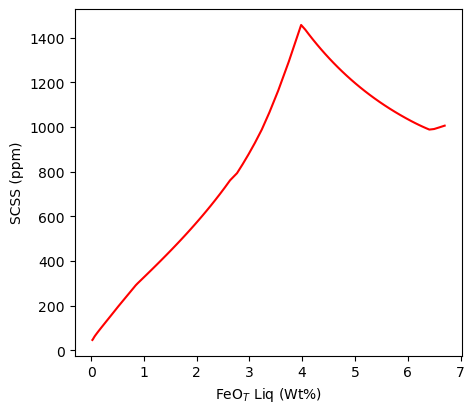

In [9]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4.5), sharey=True)
ax1.plot(Smythe_CalcSulf['MgO_Liq'], Smythe_CalcSulf['SCSS2_ppm_ideal_Smythe2017'],
         '-r')

ax1.set_ylabel('SCSS (ppm)')
ax1.set_xlabel('FeO$_{T}$ Liq (Wt%)')

## Second example 
- Here we load measured glass contents to calculate the SCSS for each sample

In [10]:
df_out2=ss.import_data('Glass_input_example.xlsx', sheet_name='Glass_input', 
                       suffix="_Liq", sample_label='Sample_ID_Liq')
df_out2.head()

We have replaced all missing liquid oxides and strings with zeros. 


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,Sample_ID_Liq,Cr2O3_Liq,Total_Liq,Sample_ID_Liq_Liq
0,50.822,2.056,13.235,13.339,0.252,6.631,11.356,2.490,0.247,0.189,0.0,0.0,0.0,0.0,H_1,0.04,100.7540,0
1,50.608,2.068,13.397,13.588,0.323,6.425,10.969,2.597,0.234,0.239,0.0,0.0,0.0,0.0,H_4,0.004,100.5429,1
2,50.427,2.081,13.276,13.806,0.231,6.516,11.222,2.577,0.232,0.176,0.0,0.0,0.0,0.0,H_7,0.046,100.6794,2
3,50.010,2.129,13.385,13.770,0.262,6.595,11.177,2.610,0.233,0.164,0.0,0.0,0.0,0.0,H_10,0.002,100.4291,3
4,49.588,2.065,13.120,13.099,0.237,6.459,10.832,2.593,0.227,0.222,0.0,0.0,0.0,0.0,H_13,0.031,98.5715,4


In [14]:
Smythe_CalcSulf=ss.calculate_S2017_SCSS(df=df_out2, T_K=1400,
P_kbar=3, Fe_FeNiCu_Sulf=0.65,
Fe3Fet_Liq=0.15)

Smythe_CalcSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
no non ideal SCSS as no Cu/CuFeNiCu


,SCSS2_ppm_ideal_Smythe2017,SCSS2_ppm_ideal_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,Mn_wt_atom,Fe2_wt_atom,Fe3_wt_atom,Ca_wt_atom,Na_wt_atom,K_wt_atom,P_wt_atom,H_wt_atom,Si_XA_ideal,Ti_XA_ideal,Al_XA_ideal,Mg_XA_ideal,Fe2_XA_ideal,Ca_XA_ideal,Na_XA_ideal,K_XA_ideal,H_XA_ideal,Si*Fe_ideal,Si_XA_non_ideal,Ti_XA_non_ideal,Al_XA_non_ideal,Mg_XA_non_ideal,Fe2_XA_non_ideal,Ca_XA_non_ideal,Na_XA_non_ideal,K_XA_non_ideal,H_XA_non_ideal,Si*Fe_non_ideal,log_SCSS_ideal,Fe_FeNiCu_Sulf_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,Sample_ID_Liq,Cr2O3_Liq,Total_Liq,Sample_ID_Liq_Liq,Fe_FeNiCu_Sulf_calc
0,1236.358668,337.735819,1400,3,0.65,0.15,0.476353,0.014492,0.146203,0.092655,0.002001,0.088873,0.015680,0.114041,0.045250,0.002953,0.001500,0.0,-13128.776773,-162.605276,-2697.483521,-1294.352927,-3046.048704,-893.037878,-599.418051,-85.694115,-0.0,4934.877695,-13336.174531,-155.279705,-2777.844304,-1344.647463,-3101.249502,-1007.165837,-620.503012,-84.422368,-0.0,4987.706982,7.119926,0.65,50.822,2.056,13.235,13.339,0.252,6.631,11.356,2.490,0.247,0.189,0.0,0.15,0.0,0.0,H_1,0.04,100.7540,0,0.65
1,1262.881353,344.981015,1400,3,0.65,0.15,0.475390,0.014608,0.148318,0.089974,0.002570,0.090731,0.016008,0.110397,0.047299,0.002804,0.001901,0.0,-13102.258153,-163.914179,-2736.508977,-1256.901601,-3109.736377,-864.501991,-626.551660,-81.362515,-0.0,5027.881257,-13309.236991,-156.529640,-2818.032368,-1305.740895,-3166.091330,-974.983136,-648.591066,-80.155052,-0.0,5081.706174,7.141151,0.65,50.608,2.068,13.397,13.588,0.323,6.425,10.969,2.597,0.234,0.239,0.0,0.15,0.0,0.0,H_4,0.004,100.5429,1,0.65
2,1300.631292,355.293158,1400,3,0.65,0.15,0.473234,0.014686,0.146837,0.091160,0.001836,0.092098,0.016249,0.112834,0.046889,0.002778,0.001398,0.0,-13042.825755,-164.785749,-2709.181782,-1273.476121,-3156.584995,-883.590034,-621.127756,-80.589429,-0.0,5080.476731,-13248.865729,-157.361945,-2789.891069,-1322.959449,-3213.788943,-996.510582,-642.976372,-79.393438,-0.0,5134.864698,7.170605,0.65,50.427,2.081,13.276,13.806,0.231,6.516,11.222,2.577,0.232,0.176,0.0,0.15,0.0,0.0,H_7,0.046,100.6794,2,0.65
3,1302.507628,355.805716,1400,3,0.65,0.15,0.469901,0.015043,0.148225,0.092379,0.002085,0.091972,0.016227,0.112521,0.047548,0.002793,0.001305,0.0,-12950.968052,-168.795183,-2734.803301,-1290.509920,-3152.247987,-881.135324,-629.859730,-81.036902,-0.0,5037.764881,-13155.556933,-161.190749,-2816.275878,-1340.655129,-3209.373339,-993.742167,-652.015499,-79.834271,-0.0,5091.695605,7.172047,0.65,50.010,2.129,13.385,13.770,0.262,6.595,11.177,2.610,0.233,0.164,0.0,0.15,0.0,0.0,H_10,0.002,100.4291,3,0.65
4,1230.690111,336.187341,1400,3,0.65,0.15,0.474535,0.014861,0.147972,0.092144,0.001921,0.089105,0.015721,0.111060,0.048110,0.002771,0.001799,0.0,-13078.693749,-166.742706,-2730.133948,-1287.224308,-3053.985553,-869.697883,-637.306360,-80.407242,-0.0,4928.861732,-13285.300336,-159.230738,-2811.467421,-1337.241848,-3109.330184,-980.843050,-659.724070,-79.213955,-0.0,4981.626616,7.115330,0.65,49.588,2.065,13.120,13.099,0.237,6.459,10.832,2.593,0.227,0.222,0.0,0.15,0.0,0.0,H_13,0.031,98.5715,4,0.65


## Third example 
- say we have 2 phases, we then identify liquid using _Liq after each column heading

In [12]:
df_out3=ss.import_data('Glass_input_example.xlsx', sheet_name='Glass_Ol_input', 
                       sample_label='Sample_ID_Liq')
df_out3.head()

We have replaced all missing liquid oxides and strings with zeros. 


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,Sample_ID,Cr2O3_Liq,MgO_Ol,SiO2_Ol,FeO_Ol,Al2O3_Ol,CaO_Ol,MnO_Ol,NiO_Ol,Sample_ID_Liq
0,50.822,2.056,13.235,13.339,0.252,6.631,11.356,2.490,0.247,0.189,0.0,0.0,0.0,0.0,H_1,0.04,40.67610,39.50335,19.94265,0.02705,0.24615,0.29030,0.19135,0
1,50.608,2.068,13.397,13.588,0.323,6.425,10.969,2.597,0.234,0.239,0.0,0.0,0.0,0.0,H_4,0.004,40.16410,39.26485,21.20375,0.02400,0.23895,0.29335,0.18700,1
2,50.427,2.081,13.276,13.806,0.231,6.516,11.222,2.577,0.232,0.176,0.0,0.0,0.0,0.0,H_7,0.046,41.77670,39.36000,18.14420,0.03220,0.23040,0.25460,0.24260,2
3,50.010,2.129,13.385,13.770,0.262,6.595,11.177,2.610,0.233,0.164,0.0,0.0,0.0,0.0,H_10,0.002,41.93930,39.27305,18.17150,0.03355,0.22475,0.26455,0.24030,3
4,49.588,2.065,13.120,13.099,0.237,6.459,10.832,2.593,0.227,0.222,0.0,0.0,0.0,0.0,H_13,0.031,40.54345,39.10665,19.30270,0.02980,0.25095,0.27350,0.18230,4


In [13]:
Smythe_CalcSulf=ss.calculate_S2017_SCSS(df=df_out3, T_K=1400,
P_kbar=3, Fe_FeNiCu_Sulf=0.65,
Fe3Fet_Liq=0.15)

Smythe_CalcSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
no non ideal SCSS as no Cu/CuFeNiCu


,SCSS2_ppm_ideal_Smythe2017,SCSS2_ppm_ideal_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,Mn_wt_atom,Fe2_wt_atom,Fe3_wt_atom,Ca_wt_atom,Na_wt_atom,K_wt_atom,P_wt_atom,H_wt_atom,Si_XA_ideal,Ti_XA_ideal,Al_XA_ideal,Mg_XA_ideal,Fe2_XA_ideal,Ca_XA_ideal,Na_XA_ideal,K_XA_ideal,H_XA_ideal,Si*Fe_ideal,Si_XA_non_ideal,Ti_XA_non_ideal,Al_XA_non_ideal,Mg_XA_non_ideal,Fe2_XA_non_ideal,Ca_XA_non_ideal,Na_XA_non_ideal,K_XA_non_ideal,H_XA_non_ideal,Si*Fe_non_ideal,log_SCSS_ideal,Fe_FeNiCu_Sulf_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,Sample_ID,Cr2O3_Liq,MgO_Ol,SiO2_Ol,FeO_Ol,Al2O3_Ol,CaO_Ol,MnO_Ol,NiO_Ol,Sample_ID_Liq,Fe_FeNiCu_Sulf_calc
0,1236.358668,337.735819,1400,3,0.65,0.15,0.476353,0.014492,0.146203,0.092655,0.002001,0.088873,0.015680,0.114041,0.045250,0.002953,0.001500,0.0,-13128.776773,-162.605276,-2697.483521,-1294.352927,-3046.048704,-893.037878,-599.418051,-85.694115,-0.0,4934.877695,-13336.174531,-155.279705,-2777.844304,-1344.647463,-3101.249502,-1007.165837,-620.503012,-84.422368,-0.0,4987.706982,7.119926,0.65,50.822,2.056,13.235,13.339,0.252,6.631,11.356,2.490,0.247,0.189,0.0,0.15,0.0,0.0,H_1,0.04,40.67610,39.50335,19.94265,0.02705,0.24615,0.29030,0.19135,0,0.65
1,1262.881353,344.981015,1400,3,0.65,0.15,0.475390,0.014608,0.148318,0.089974,0.002570,0.090731,0.016008,0.110397,0.047299,0.002804,0.001901,0.0,-13102.258153,-163.914179,-2736.508977,-1256.901601,-3109.736377,-864.501991,-626.551660,-81.362515,-0.0,5027.881257,-13309.236991,-156.529640,-2818.032368,-1305.740895,-3166.091330,-974.983136,-648.591066,-80.155052,-0.0,5081.706174,7.141151,0.65,50.608,2.068,13.397,13.588,0.323,6.425,10.969,2.597,0.234,0.239,0.0,0.15,0.0,0.0,H_4,0.004,40.16410,39.26485,21.20375,0.02400,0.23895,0.29335,0.18700,1,0.65
2,1300.631292,355.293158,1400,3,0.65,0.15,0.473234,0.014686,0.146837,0.091160,0.001836,0.092098,0.016249,0.112834,0.046889,0.002778,0.001398,0.0,-13042.825755,-164.785749,-2709.181782,-1273.476121,-3156.584995,-883.590034,-621.127756,-80.589429,-0.0,5080.476731,-13248.865729,-157.361945,-2789.891069,-1322.959449,-3213.788943,-996.510582,-642.976372,-79.393438,-0.0,5134.864698,7.170605,0.65,50.427,2.081,13.276,13.806,0.231,6.516,11.222,2.577,0.232,0.176,0.0,0.15,0.0,0.0,H_7,0.046,41.77670,39.36000,18.14420,0.03220,0.23040,0.25460,0.24260,2,0.65
3,1302.507628,355.805716,1400,3,0.65,0.15,0.469901,0.015043,0.148225,0.092379,0.002085,0.091972,0.016227,0.112521,0.047548,0.002793,0.001305,0.0,-12950.968052,-168.795183,-2734.803301,-1290.509920,-3152.247987,-881.135324,-629.859730,-81.036902,-0.0,5037.764881,-13155.556933,-161.190749,-2816.275878,-1340.655129,-3209.373339,-993.742167,-652.015499,-79.834271,-0.0,5091.695605,7.172047,0.65,50.010,2.129,13.385,13.770,0.262,6.595,11.177,2.610,0.233,0.164,0.0,0.15,0.0,0.0,H_10,0.002,41.93930,39.27305,18.17150,0.03355,0.22475,0.26455,0.24030,3,0.65
4,1230.690111,336.187341,1400,3,0.65,0.15,0.474535,0.014861,0.147972,0.092144,0.001921,0.089105,0.015721,0.111060,0.048110,0.002771,0.001799,0.0,-13078.693749,-166.742706,-2730.133948,-1287.224308,-3053.985553,-869.697883,-637.306360,-80.407242,-0.0,4928.861732,-13285.300336,-159.230738,-2811.467421,-1337.241848,-3109.330184,-980.843050,-659.724070,-79.213955,-0.0,4981.626616,7.115330,0.65,49.588,2.065,13.120,13.099,0.237,6.459,10.832,2.593,0.227,0.222,0.0,0.15,0.0,0.0,H_13,0.031,40.54345,39.10665,19.30270,0.02980,0.25095,0.27350,0.18230,4,0.65
